Author: Nik Alleyne <br>
Author Blog: https://www.securitynik.com <br>
Author GitHub:github.com/securitynik <br>
Author Books: [  <br>
                "https://www.amazon.ca/Learning-Practicing-Leveraging-Practical-Detection/dp/1731254458/",  <br>
                "https://www.amazon.ca/Learning-Practicing-Mastering-Network-Forensics/dp/1775383024/" <br>
            ] <br>

## 14. Beginning Deep Learning, - Linear Regression, Tensorflow

This post is part of my beginning machine learning series.  <br>
The series includes the following: <br>

01 - Beginning Numpy <br>
02 - Beginning Tensorflow  <br>
03 - Beginning PyTorch <br>
04 - Beginning Pandas <br>
05 - Beginning Matplotlib <br>
06 - Beginning Data Scaling <br>
07 - Beginning Principal Component Analysis (PCA) <br>
08 - Beginning Machine Learning Anomaly Detection - Isolation Forest and Local Outlier Factor <br>
09 - Beginning Unsupervised Machine Learning - Clustering - K-means and DBSCAN <br>
10 - Beginning Supervise Learning - Machine Learning - Logistic Regression, Decision Trees and Metrics <br>
11 - Beginning Linear Regression - Machine Learning <br>
12 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow <br>
13 - Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch <br>
14 - Beginning Deep Learning, - Linear Regression, Tensorflow <br>
15 - Beginning Deep Learning, - Linear Regression, PyTorch <br>
16 - Beginning Deep Learning, - Classification, Tensorflow <br>
17 - Beginning Deep Learning, - Classification, Pytorch <br>
18 - Beginning Deep Learning, - Classification - regression - MIMO - Functional API Tensorflow <br> 
19 - Beginning Deep Learning, - Convolution Networks - Tensorflow <br>
20 - Beginning Deep Learning, - Convolution Networks - PyTorch <br>
21 - Beginning Regularization - Early Stopping, Dropout, L2 (Ridge), L1 (Lasso) <br>
23 - Beginning Model TFServing <br>

But conn.log is not the only file within Zeek. Let's build some models for DNS and HTTP logs. <br>
I choose unsupervised, because there are no labels coming with these data. <br>

24 - Continuing Anomaly Learning - Zeek DNS Log - Machine Learning <br>
25 - Continuing Unsupervised Learning - Zeek HTTP Log - Machine Learning <br>

This was a specific ask by someone in one of my class. <br>
26 - Beginning - Reading Executables and Building a Neural Network to make predictions on suspicious vs suspicious  <br><br>

With 26 notebooks in this series, it is quite possible there are things I could have or should have done differently.  <br>
If you find any thing, you think fits those criteria, drop me a line. <br>

In [1]:
# Let's import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
# This is the data we previously saved from the Pandas notebook
df_conn = pd.read_csv(r'df_conn_cleaned.csv', index_col=0)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,127.0.0.1,27762,127.0.0.1,58552,0.000000,0,0,0,0,0,0
1,10.0.0.4,27761,10.0.0.4,48798,0.000000,0,0,0,0,0,0
2,10.0.0.4,27761,10.0.0.4,48804,0.000000,0,0,0,0,0,0
3,127.0.0.1,27762,127.0.0.1,58568,0.000000,0,0,0,0,0,0
4,10.0.0.4,48786,10.0.0.4,27761,0.000000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4430183,10.0.0.21,55757,10.0.0.4,9200,0.000051,0,0,1,52,1,40
4430184,10.0.0.4,37236,10.0.0.4,9200,0.000023,0,0,0,0,1,40
4430185,10.0.0.4,37244,10.0.0.4,9200,0.000005,0,0,0,0,1,40
4430186,10.0.0.4,37246,10.0.0.4,9200,0.000005,0,0,0,0,1,40


This file represents Zeek (formerly Bro) connection log - conn.log`. <br>
Zeek is a framework used for Network Security Monitoring.  <br>
This entire series is based on using Zeek's data.  <br>
The majority of the notebooks use the conn.log <br>
You can learn more about Zeek here:
   
    https://zeek.org/

Alternatively, come hang out with us in the:
SANS SEC595: Applied Data Science and Machine Learning for Cybersecurity Professionals

        https://www.sans.org/cyber-security-courses/applied-data-science-machine-learning/ OR

SEC503 SEC503: Network Monitoring and Threat Detection In-Depth

        https://www.sans.org/cyber-security-courses/network-monitoring-threat-detection/


Here are also some blog posts on using Zeek for security monitoring
Installing Zeek: 

        https://www.securitynik.com/2020/06/installing-zeek-314-on-ubuntu-2004.html

Detecting PowerShell Empire Usage: 

        https://www.securitynik.com/2022/02/powershell-empire-detection-with-zeek.html

Detecting Log4J Vulnerability Exploitation: 

        https://www.securitynik.com/2021/12/continuing-log4shell-zeek-detection.html


In [3]:
# Rather than using the entire dataset, let's take a random sample of 100K records
# Training on this entire dataset will take a while on this system
# Besides, we learned in the autoencoder notebooks, that this dataset consists of a number of samples/observations
# that has 0 for each feature value
#   12. Beginning Deep Learning - Anomaly Detection with AutoEncoders, Tensorflow
#   13. Beginning Deep Learning - Anomaly Detection with AutoEncoders, PyTroch

df_conn = df_conn.sample(n=100000, random_state=10, replace=True)
df_conn

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
1929743,10.0.0.4,44300,10.0.0.4,9200,0.0,0,0,0,0,0,0
3589445,10.0.0.4,41126,10.0.0.4,9200,0.0,0,0,0,0,0,0
3251328,10.0.0.4,40710,10.0.0.4,9200,0.0,0,0,0,0,0,0
1976281,10.0.0.4,44266,10.0.0.4,9200,0.0,0,0,0,0,0,0
804336,10.0.0.4,41638,10.0.0.4,9200,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2990768,10.0.0.4,41282,10.0.0.4,9200,0.0,0,0,0,0,0,0
4164400,10.0.0.4,40150,10.0.0.4,9200,0.0,0,0,0,0,0,0
3517900,10.0.0.4,41296,10.0.0.4,9200,0.0,0,0,0,0,0,0
1207513,10.0.0.4,41842,10.0.0.4,9200,0.0,0,0,0,0,0,0


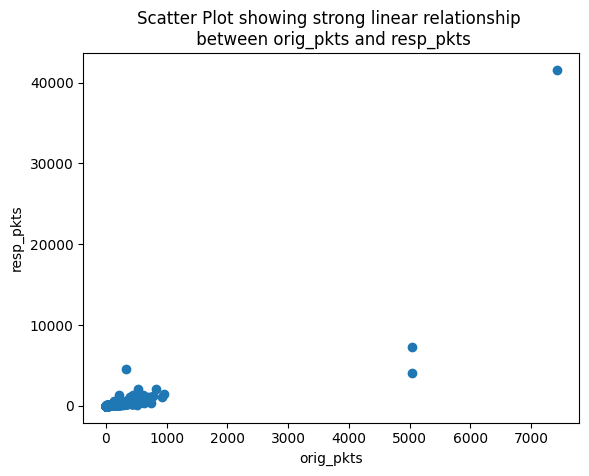

In [4]:
# Confirming the positive correlation
# We can see from below, generally, as x increases, y increases
# and as y increases, x increases. 
# Hence our strong positive correlation.
# What we need is a line that best fits this data
# Meaning, we need a m and b for y = mx + b
# The question is which line works best?
plt.title('Scatter Plot showing strong linear relationship \n between orig_pkts and resp_pkts')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.xlabel('orig_pkts')
plt.ylabel('resp_pkts')
plt.show()

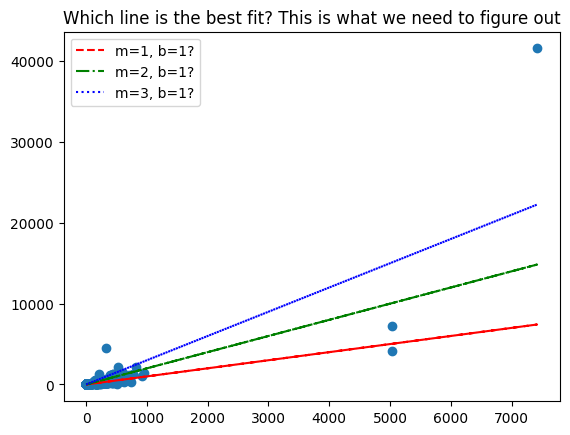

In [5]:
# Trying to figure out which line best fits our data
# As in which one will produce the smallest areas
plt.title('Which line is the best fit? This is what we need to figure out')
plt.scatter(df_conn['orig_pkts'], df_conn['resp_pkts'])
plt.plot(df_conn.orig_pkts, (1 * df_conn.orig_pkts) + 1, label='m=1, b=1?', c='r', linestyle='--' )
plt.plot(df_conn.orig_pkts, (2 * df_conn.orig_pkts) + 1, label='m=2, b=1?', c='g', linestyle='dashdot' )
plt.plot(df_conn.orig_pkts, (3 * df_conn.orig_pkts) + 1, label='m=3, b=1?', c='b', linestyle='dotted' )
plt.legend(loc='best')


In [6]:
# Let's build our own Linear Regression model, before moving on to sklearn
# Setup our x and y
X = df_conn['orig_pkts'].values.astype(np.float32).reshape(-1,1)
y = df_conn['resp_pkts'].values.astype(np.float32).reshape(-1,1)

# Get a view of teh data
X[:5], y[:5]

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32))

In [7]:
# Import the scaler to scale the data
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Setup the scaler
min_max_scaler = MinMaxScaler(feature_range=(0,1))

# Fit on the normal data
min_max_scaler.fit(X)

# Transform the normal data
X_scaled = min_max_scaler.transform(X)
X_scaled

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [9]:
# Because we learned about Linear Regression in 
#   11. Beginning Linear Regression - Machine Learning
# I will jump straight into the deep learning part of Linear Regression

In [10]:
# Import the tensorflow library
import tensorflow as tf

In [11]:
# Setup the model
linear_model = tf.keras.Sequential(name='Linear_Model')

# Add the input layer
linear_model.add(tf.keras.layers.Input(shape=(1,), batch_size=32, name='linear_input'))

# Add a hidden layer with 4 neurons
linear_model.add(tf.keras.layers.Dense(units=8, activation='relu', use_bias=True, name='first_hidden'))

# Add a second layer with 4 neurons
linear_model.add(tf.keras.layers.Dense(units=8, activation='relu', use_bias=True, name='second_hidden'))

# Add an output layer with a linear activation
# For the activation, we can use "linear" or "None"
linear_model.add(tf.keras.layers.Dense(units=1, activation=None, use_bias=True, name='output'))

# Get the model summary
linear_model.summary()

Model: "Linear_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_hidden (Dense)        (32, 8)                   16        
                                                                 
 second_hidden (Dense)       (32, 8)                   72        
                                                                 
 output (Dense)              (32, 1)                   9         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


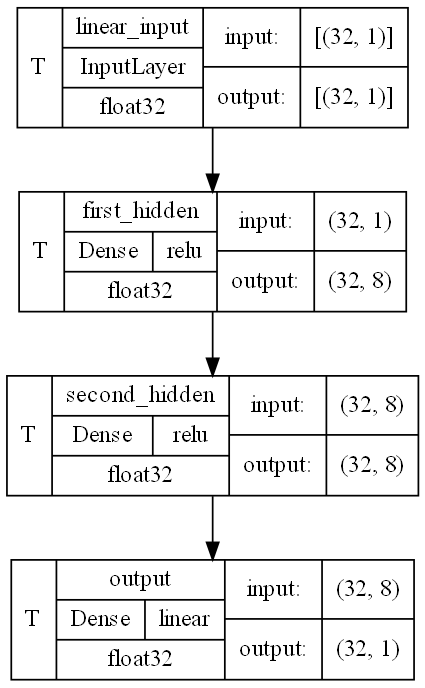

In [12]:
# Plot the model
tf.keras.utils.plot_model(model=linear_model, show_dtype=True, \
                          show_layer_activations=True, show_layer_names=True, \
                            show_shapes=True, show_trainable=True, dpi=125)

In [13]:
# Compile the model
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])

In [14]:
# Get a look at the initial model parameters - weights and biases
linear_model.weights

[<tf.Variable 'first_hidden/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[ 0.5028511 , -0.37330464, -0.1257968 , -0.5442027 ,  0.18743157,
         -0.4385221 ,  0.51522803,  0.43640757]], dtype=float32)>,
 <tf.Variable 'first_hidden/bias:0' shape=(8,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'second_hidden/kernel:0' shape=(8, 8) dtype=float32, numpy=
 array([[ 0.58276635,  0.19902271, -0.23494259, -0.11799434, -0.07599324,
         -0.27028283,  0.0577879 , -0.40789884],
        [ 0.0048039 ,  0.19420993, -0.10230857, -0.06365627, -0.533482  ,
         -0.00932831,  0.16831768, -0.516431  ],
        [ 0.5831737 ,  0.2915076 , -0.3265224 , -0.32113644, -0.5684793 ,
         -0.5623481 ,  0.354221  ,  0.44397956],
        [ 0.25043637,  0.1650871 ,  0.44328552,  0.55194765, -0.24454403,
         -0.2689662 ,  0.4614758 , -0.55662537],
        [-0.38348892, -0.34081036,  0.16009855, -0.5001529 ,  0.21925521,
         -0.14260629,

In [15]:
# Before training the model, split the data into train and test set
# import the train test split library
from sklearn.model_selection import train_test_split

In [16]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, \
                                                    train_size=0.8, random_state=10, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 1), (20000, 1), (80000, 1), (20000, 1))

In [17]:
# Train the model and specify a validation set of .20 of the training data
history = linear_model.fit(x=X_train, y=y_train, epochs=20, validation_split=0.2, shuffle=True)

Epoch 1/20
2000/2000 [==============================] - 5s 2ms/step - loss: 29312.1562 - mse: 29312.1562 - val_loss: 710.4578 - val_mse: 710.4578
Epoch 2/20
2000/2000 [==============================] - 4s 2ms/step - loss: 29095.0938 - mse: 29095.0938 - val_loss: 652.5005 - val_mse: 652.5005
Epoch 3/20
2000/2000 [==============================] - 3s 2ms/step - loss: 28699.6328 - mse: 28699.6328 - val_loss: 557.3998 - val_mse: 557.3998
Epoch 4/20
2000/2000 [==============================] - 3s 2ms/step - loss: 28154.6465 - mse: 28154.6465 - val_loss: 425.4500 - val_mse: 425.4500
Epoch 5/20
2000/2000 [==============================] - 4s 2ms/step - loss: 27268.2637 - mse: 27268.2637 - val_loss: 269.9909 - val_mse: 269.9909
Epoch 6/20
2000/2000 [==============================] - 4s 2ms/step - loss: 26441.9531 - mse: 26441.9531 - val_loss: 172.4218 - val_mse: 172.4218
Epoch 7/20
2000/2000 [==============================] - 3s 2ms/step - loss: 25382.9277 - mse: 25382.9277 - val_loss: 119.250

In [18]:
# How did the model do
# Visualizing the model's performance
# Grabbing the keys from the history callback
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

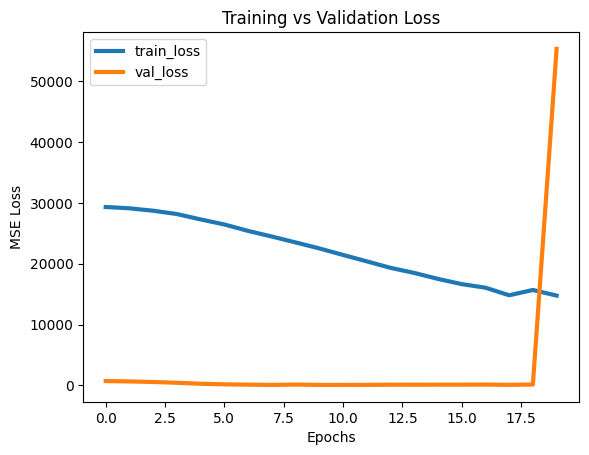

In [19]:
# Plotting the training loss values
plt.title('Training vs Validation Loss')
plt.plot(history.history['loss'], lw=3, label='train_loss')
plt.plot(history.history['val_loss'], lw=3, label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

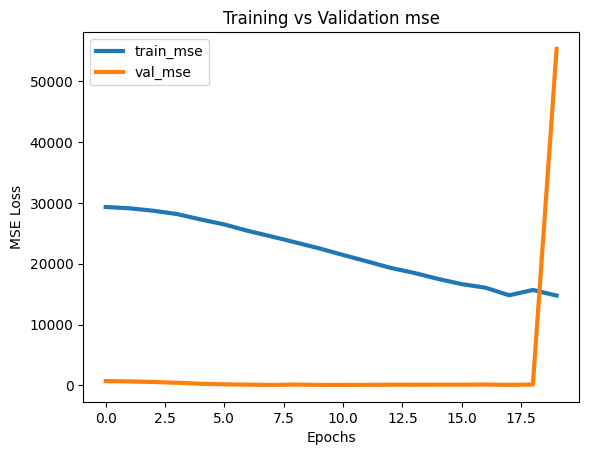

In [20]:
# Plotting the validation MSE values
plt.title('Training vs Validation mse')
plt.plot(history.history['mse'], lw=3, label='train_mse')
plt.plot(history.history['val_mse'], lw=3, label='val_mse')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

In [21]:
# Make and store some predictions on the training data
train_pred = linear_model.predict(X_train)
train_pred

2500/2500 [==============================] - 3s 1ms/step


array([[234.2871],
       [234.2871],
       [234.2871],
       ...,
       [234.2871],
       [234.2871],
       [234.2871]], dtype=float32)

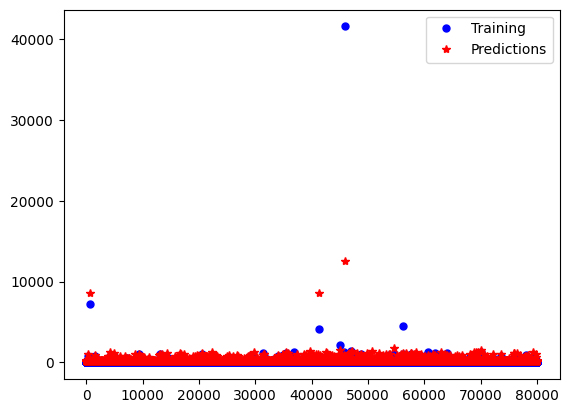

In [22]:
# With the trained model. Plot the training data
# Plotting the train predictions vs actual values, shows that the model does not seem to be doing too bad
plt.plot(y_train, linestyle='', marker='o', c='b', markersize=5, label='Training')

# Plot the predicted data
plt.plot(train_pred, linestyle='', marker='*', c='r', label='Predictions')
plt.legend()
plt.show()

In [23]:
# Quite a few of the predictions seems to fall inline with the original values
# However, see some predicted values that are definitely different from the original values
# Looking at the learned parameters - weights and biases
linear_model.weights

[<tf.Variable 'first_hidden/kernel:0' shape=(1, 8) dtype=float32, numpy=
 array([[10.133374  , -0.37330464, -0.1257968 , -0.5442027 ,  8.722149  ,
         -0.4385221 ,  9.937021  , 10.45717   ]], dtype=float32)>,
 <tf.Variable 'first_hidden/bias:0' shape=(8,) dtype=float32, numpy=
 array([0.91700625, 0.        , 0.        , 0.        , 7.194012  ,
        0.        , 1.8593959 , 0.27059925], dtype=float32)>,
 <tf.Variable 'second_hidden/kernel:0' shape=(8, 8) dtype=float32, numpy=
 array([[ 7.7590766e+00,  7.4040074e+00, -4.9070692e-01, -3.8978544e-01,
         -5.1671213e-01,  6.9418502e+00,  7.2040725e+00,  6.8319721e+00],
        [ 4.8038960e-03,  1.9420993e-01, -1.0230857e-01, -6.3656271e-02,
         -5.3348202e-01, -9.3283057e-03,  1.6831768e-01, -5.1643097e-01],
        [ 5.8317369e-01,  2.9150760e-01, -3.2652241e-01, -3.2113644e-01,
         -5.6847930e-01, -5.6234813e-01,  3.5422099e-01,  4.4397956e-01],
        [ 2.5043637e-01,  1.6508710e-01,  4.4328552e-01,  5.5194765e-01,

In [24]:
# Make a prediction on a single item
# Setup the sample
new_sample = np.array([1500], dtype=np.float32, ndmin=2)
new_sample

array([[1500.]], dtype=float32)

In [25]:
# Remember, all data on which prediction needs to be made,
# Has to go through the same preprocessing steps before making prediction
# Scaling the data
new_sample_scaled = min_max_scaler.transform(X=new_sample)
new_sample_scaled


array([[0.20215634]], dtype=float32)

In [26]:
# Make the prediction on the scaled data
linear_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 64ms/step


array([[2732.7178]], dtype=float32)

In [27]:
# We did a prediction on a sample data point
# How are we doing with the test data
# Making predictions on the test data
test_preds = linear_model.predict(X_test)
test_preds

625/625 [==============================] - 1s 1ms/step


array([[234.2871],
       [234.2871],
       [234.2871],
       ...,
       [234.2871],
       [234.2871],
       [234.2871]], dtype=float32)

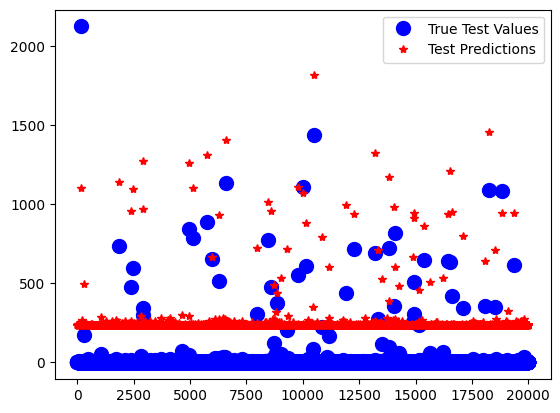

In [28]:
# With the trained model. Plot the test data
# Below seems to suggest the model is not doing too bad, when comparing the true y with the predicted y
plt.plot(y_test, linestyle='', marker='o', c='b', markersize=10, label='True Test Values')

# Plot the predicted data
plt.plot(test_preds, linestyle='', marker='*', c='r', label='Test Predictions')
plt.legend()
plt.show()

In [29]:
# Get the model's r2 score
from sklearn.metrics import r2_score

In [30]:
# The r2 with a value of 1, means the model is perfect
# r2 of 0 means the model is not doing better than average
# r2 of less than 0 means the model is terrible
# This score suggest we have a model that is performing well
r2_score(y_true=y_test, y_pred=test_preds)

-47.64881306211179

In [31]:
# Looks like we can save this model at this time
# importing the the os library
import os

In [32]:
# Create the location to save the model
PATH = './SAVED_MODELS/LR_TF/'
MODELS_PATH = os.makedirs(name=PATH, exist_ok=True)

In [33]:
# Save the model
tf.keras.models.save_model(model=linear_model, filepath=f'{PATH}linear_reg.tf')

INFO:tensorflow:Assets written to: ./SAVED_MODELS/LR_TF/linear_reg.tf\assets


INFO:tensorflow:Assets written to: ./SAVED_MODELS/LR_TF/linear_reg.tf\assets


In [34]:
# With the model saved, time to reload and make predictions
loaded_tf_lr_model = tf.keras.models.load_model(filepath=f'{PATH}linear_reg.tf')
loaded_tf_lr_model

In [35]:
# Make predictions on the loaded model
loaded_tf_lr_model.predict(new_sample_scaled)

1/1 [==============================] - 0s 82ms/step


array([[2732.7178]], dtype=float32)

In [ ]:
# Time to move on